# ObsID : 0827211301, SRCNUM : 20, Instru : EPN
Not on Simbad. Previous observation of the source ObsID : 0945020137, SRCNUM : 21

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')
spec = Spectrum(spec_fnames[0])

Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.5 12-**")


1 spectrum  in use
 
Spectral Data File: P0827211301PNS003SRSPEC0014.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.725e-03 +/- 6.245e-04 (38.3 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-12
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 2.522e+04 sec
 Using fit statistic: chi
 Using Background File                P0827211301PNS003BGSPEC0014.FTZ
  Background Exposure Time: 2.522e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY4.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0827211301PNS003SRCARF0014.FTZ

     2 channels (1-2) ignored in spectrum #     1
     1 channels (12-12) ignored in spectrum #     1



(-0.5, 857.5, 661.5, -0.5)

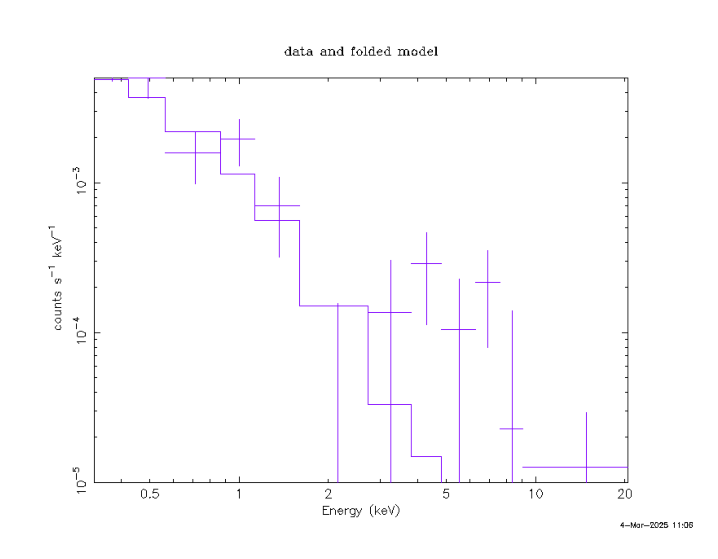

In [3]:
img = plt.imread(glob.glob('*Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [4]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              4.785540e+11     using 9 bins.

Tes

**Mauvaise qualité d’ajustement :**
- Statistique de chi2 élevée :  χ^2=45.4 pour 9 degrés de liberté, ce qui donne un réduit de χ^2=45.4/9=5.04
    - Un bon ajustement aurait un χ^2 proche de 1. Ici, la valeur est trop élevée, ce qui signifie que le modèle ne correspond pas bien aux données.
- Paramètre N_H pegged (bloqué à 4.94e-17) : La colonne densité (absorption interstellaire) est bloquée à une valeur extrêmement basse.
Problème : Cela signifie que Xspec trouve que l'absorption n’a aucun effet sur les données, ce qui est suspect.
- Paramètres avec des erreurs anormalement grandes :
    - Température 𝑘_𝑇=3.11 keV avec une incertitude de ±2.78 keV. Cela indique que la température est mal contrainte.
    - Normalisation norm=3.75×10^−6 avec une grande erreur relative. Indique aussi un mauvais ajustement.

(-0.5, 856.5, 661.5, -0.5)

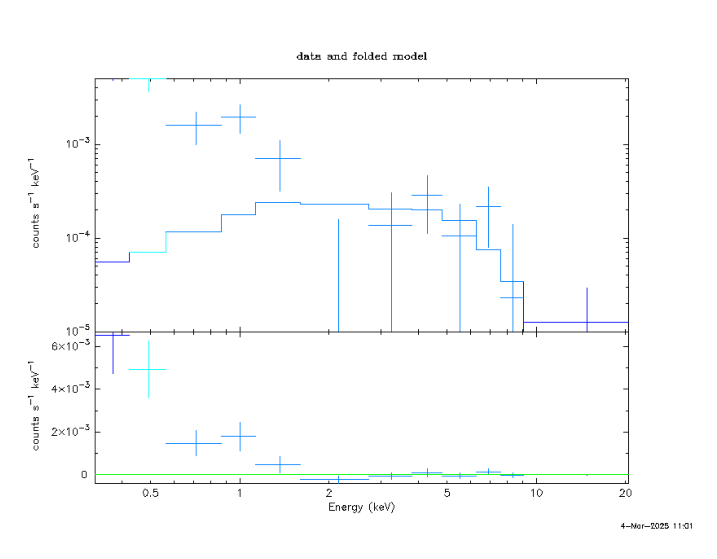

In [5]:
img = plt.imread(glob.glob('*Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.914792e+10     using 9 bins.

Test statistic : Chi-Squared              3.914792e+10     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
21.9509      0.471551     -2     0.0168942       198.157   2.18794e-06
11.9378      260838       -2    0.00386181       199.200   1.14751e-05
10.7861      85770.8      -2    0.00162282       199.293   1.52922e-05
10.

(-0.5, 856.5, 661.5, -0.5)

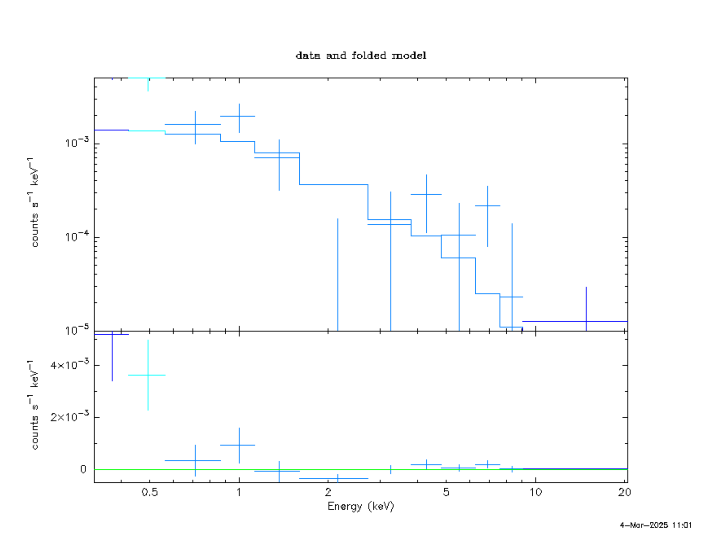

In [17]:
img = plt.imread(glob.glob('*Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [8]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              8.933408e+09     using 9 bins.

Test statistic : Chi-Squared              8.933408e+09     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
13.4264      2.49594      -1      0.872542      0.429512   3.6

(-0.5, 859.5, 660.5, -0.5)

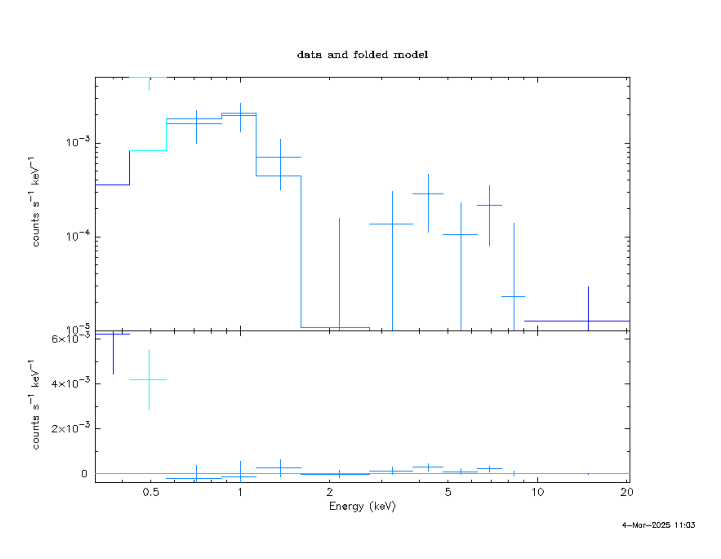

In [9]:
img = plt.imread(glob.glob('*Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [10]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.805330e+11     using 9 bins.

Test statistic : Chi-Squared              1.805330e+11     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
20.0878      0.332027     -1      0.471880      0.292804   1.69176e-06
19.9925      242166       -1     0.0195918     -0.574652   4.10408e-07
19.0884      1.51783e+06   0    0.00923922     -0.677105   4.74477e-07
1

(-0.5, 857.5, 660.5, -0.5)

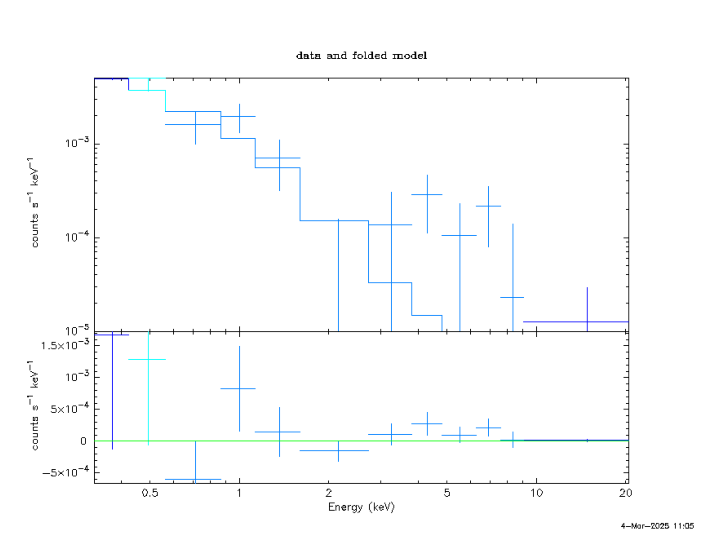

In [11]:
img = plt.imread(glob.glob('*Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

- Coordinates : 52.74 -28.63
- nH = 2^20 cm^-2

The different models give a column density of :
- bbody : nH = 5.82007*10^5
- bremss : nH = 1.38134*10^9
- apec : nH = 1.03516*10^22
- powerlaw : nH = 1.89351*10^6

None of the values correspond to 3DNH-tool one. Still, apec is the closest one.

## Flux

In [12]:
AllModels.calcFlux(".2 12.0")

 Model Flux 2.9705e-05 photons (3.7979e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [13]:
Flux = 3.7979e-14 # ergs/cm^2/s

### ESASky

https://sky.esa.int/esasky/?target=52.73769389063616%20-28.634488186049&hips=GALEX+GR6%2F7+AIS+color&fov=0.182241278518&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033057.0-283804
- IAU name : 4XMM J033056.9-283804
- RA : 03h 30m 57.047s
- DEC : -28° 38' 04.16"

### Luminosity
No distance available.

In [14]:
# For a star in the milky way : d=[1 pc - 30 kpc]
d_pc = 1 # Distance en pc
d_kpc = 30 # Distance en kpc

d1_cm = d_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_pc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1 = 4*np.pi*Flux*(d1_cm)**2 # erg/s
L2 = 4*np.pi*Flux*(d2_cm)**2 # erg/s


print(color.BOLD+"For a star in the milky way? with d=[1 pc - 30 kpc] :"+color.END)
print(f"Luminosity : [{L1}, {L2}] erg/s")

For a star in the milky way? with d=[1 pc - 30 kpc] :
Luminosity : [4.5442350851385494e+24, 4.5442350851385484e+30] erg/s


In [15]:
# For a galaxy : d=[1 Mpc - 10 Gpc]
d_Mpc = 1 # Distance en Mpc
d_Gpc = 10 # Distance en Gpc

d1_cm = d_Mpc*3.0857*10**24 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_Gpc*3.0857*10**27 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1 = 4*np.pi*Flux*(d1_cm)**2 # erg/s
L2 = 4*np.pi*Flux*(d2_cm)**2 # erg/s


print(color.BOLD+"For a galaxy? with d=[1 Mpc - 10 Gpc] :"+color.END)
print(f"Luminosity : [{L1}, {L2}] erg/s")

For a galaxy? with d=[1 Mpc - 10 Gpc] :
Luminosity : [4.5442350851385495e+36, 4.54423508513855e+44] erg/s


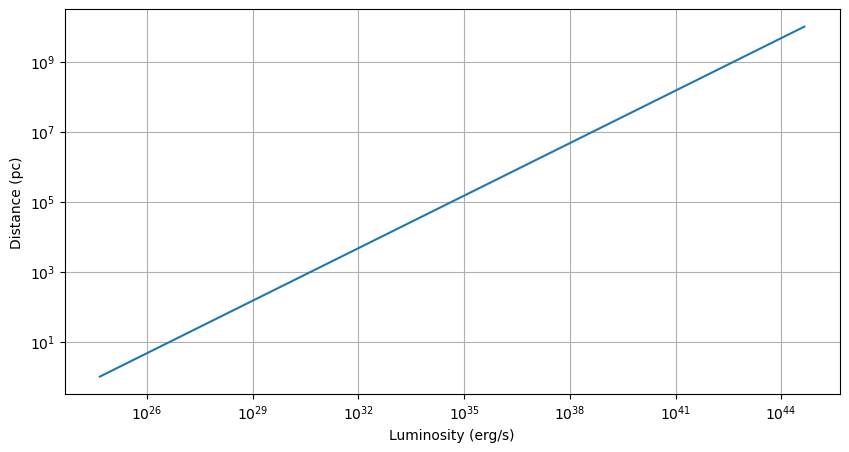

In [16]:
D_pc = np.arange(1, 10**10, 1000)

d_cm = D_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L = 4*np.pi*Flux*(d_cm)**2 # erg/s

plt.figure(figsize=[10,5])
plt.plot(L,D_pc)
plt.xlabel("Luminosity (erg/s)")
plt.ylabel("Distance (pc)")
plt.xscale("log")
plt.yscale("log")
plt.grid()